# Introduction

In this notebook, we'll be visualizing the outcomes of the battles using t-SNE and check it's similarities with the actual outcomes.

### Step 1 : Importing the necessary libraries and dependencies

In [14]:
#Importing the necessary computational libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Step 2 : Load the dataset into a dataframe

Go to the Kaggle page to download the dataset (https://www.kaggle.com/mylesoneill/game-of-thrones)

In [16]:
battles = pd.read_csv("/Users/yashtawade/Downloads/game-of-thrones/battles.csv")
attacker_outcome = battles["attacker_outcome"].fillna("NaN")

### Step 3 : Remove missing elements

In [18]:
#Count the number of missing elements (NaN) in each column
counter_nan = battles.isnull().sum()
counter_without_nan=counter_nan[counter_nan == 0]
#Cleaning the dataset of missing elements
battles = battles[counter_without_nan.keys()]

### Step 4: Create feature vectors

In [20]:
labelEncoder = LabelEncoder()
for col in battles.columns.values:
    if battles[col].dtypes == "object":
        unique_labels=np.unique(battles[col])
        labelEncoder.fit(unique_labels)
        battles[col]=labelEncoder.transform(battles[col])

In [23]:
labelEncoder.fit(np.unique(attacker_outcome))
attacker_outcome=labelEncoder.transform(attacker_outcome)

In [24]:
X = battles.ix[:].values
standard_scalar = StandardScaler()
x_std = standard_scalar.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Step 5 : Performing t-SNE by reducing it to 2 dimensions

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_std_2d = tsne.fit_transform(x_std)

### Step 6 : t-SNE visualization using matplotlib

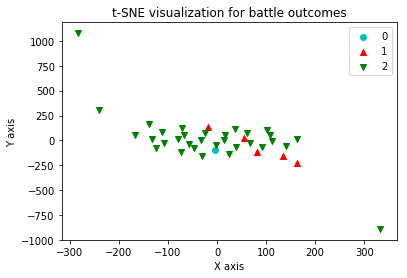

In [41]:
#Importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

marker_legend=('o', '^', 'v')
color_legend = {0:'c', 1:'r', 2:'g'}

plt.figure()
for idx, cl in enumerate(np.unique(attacker_outcome)):
    plt.scatter(x=x_std_2d[attacker_outcome==cl,0], y=x_std_2d[attacker_outcome==cl,1], c=color_legend[idx], marker=marker_legend[idx], label=cl)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend(loc='upper right')
plt.title('t-SNE visualization for battle outcomes')
plt.show()

